### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 17,191914,7343,80347
Mar 18,204773,8156,82667
Mar 19,219094,8959,84879
Mar 20,236216,9396,86300
Mar 21,284217,11822,92971


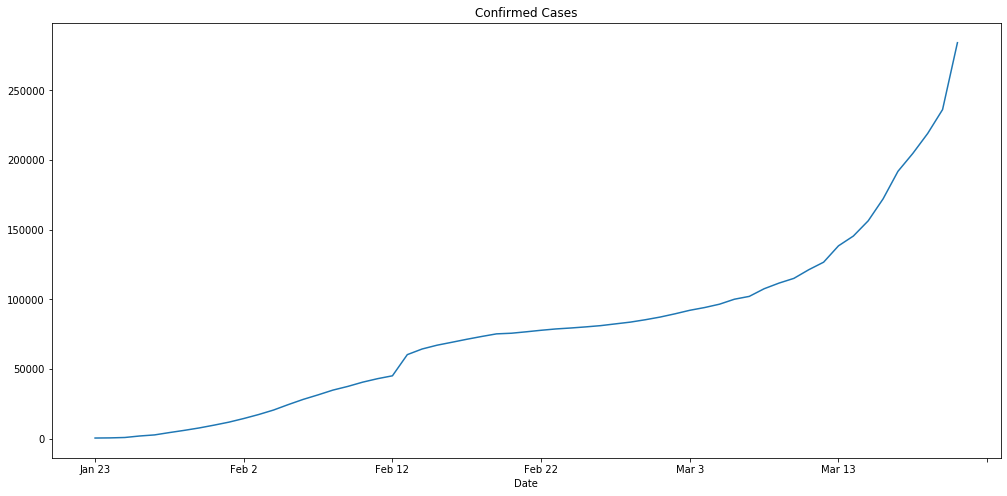

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

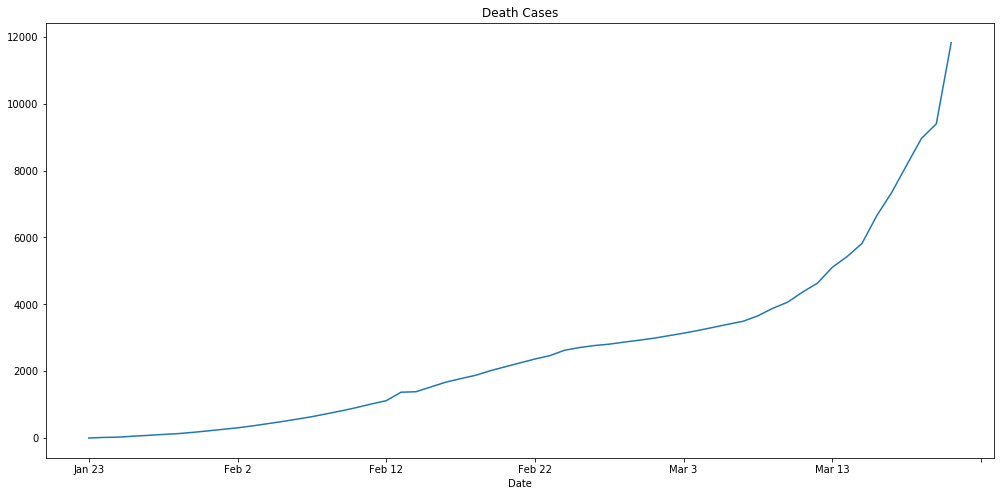

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

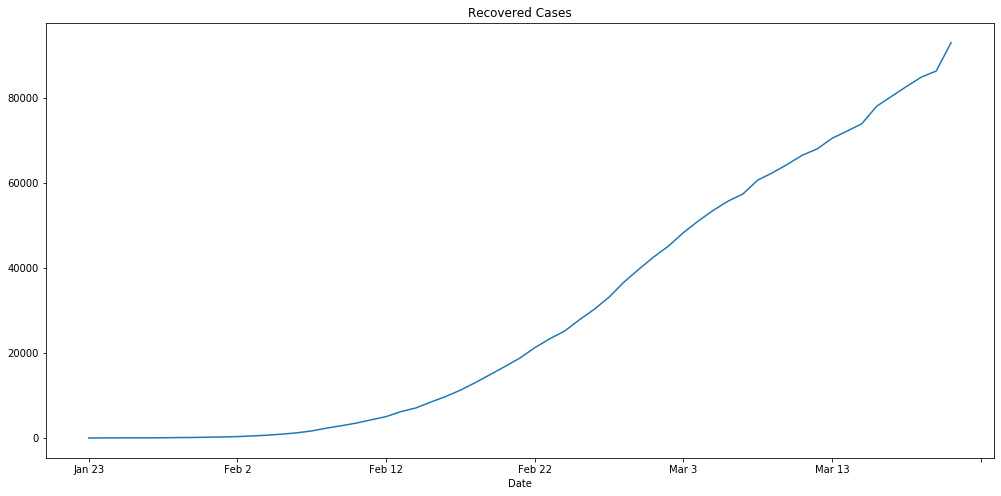

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

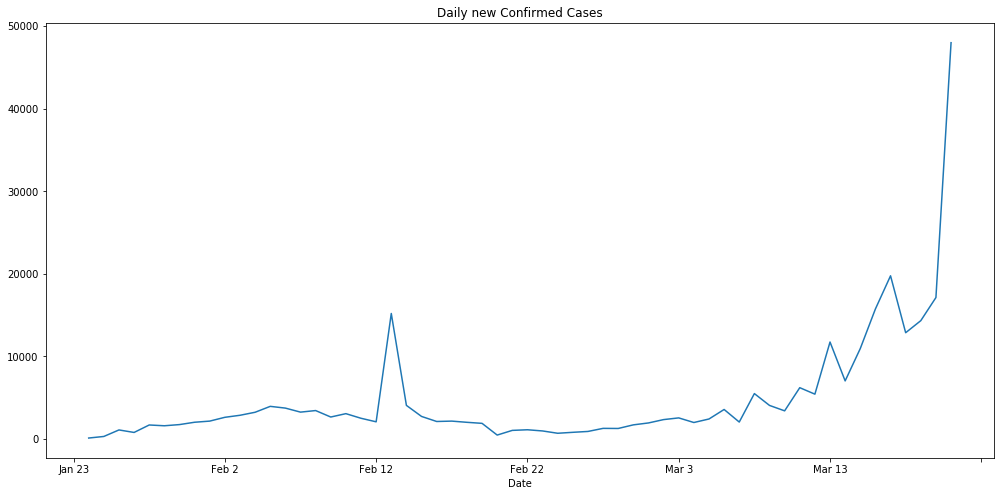

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

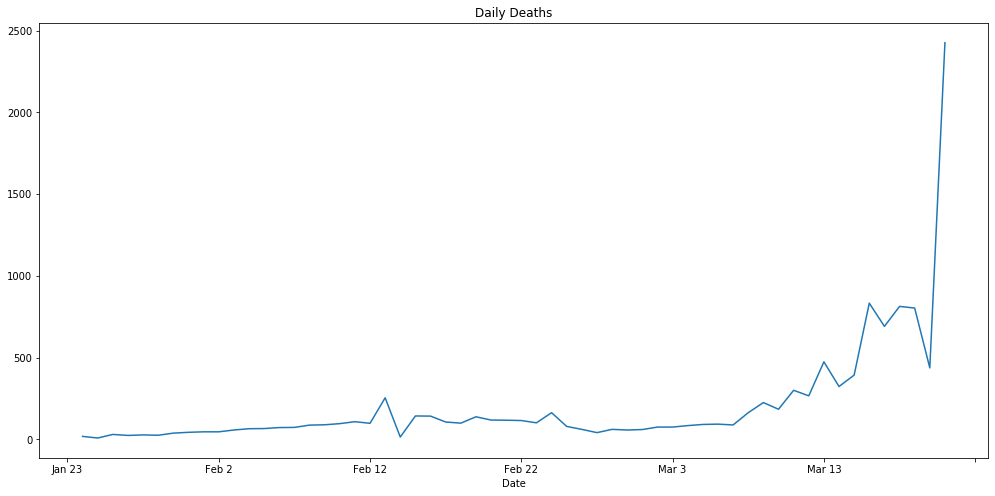

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

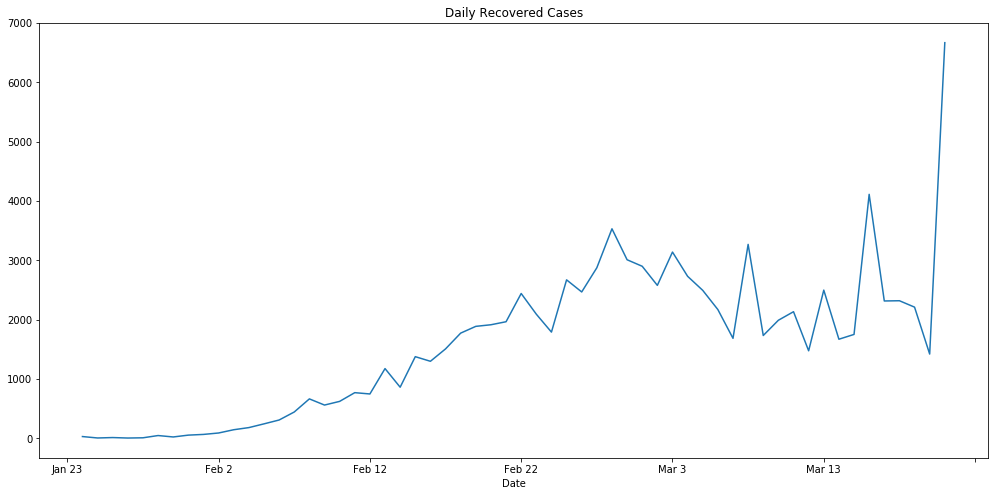

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=1136.530, BIC=1140.616, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1137.250, BIC=1143.380, Fit time=0.257 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1136.557, BIC=1142.686, Fit time=0.246 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1138.419, BIC=1146.591, Fit time=0.619 seconds
Total fit time: 1.944 seconds


In [15]:
confirmed_model.aic()

1136.5296794423803

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-22 - 333058
2020-03-23 - 382740
2020-03-24 - 433262
2020-03-25 - 484625
2020-03-26 - 536828


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=812.660, BIC=824.919, Fit time=1.333 seconds
Fit ARIMA: order=(0, 2, 0); AIC=807.626, BIC=811.712, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=793.147, BIC=799.276, Fit time=0.273 seconds
Fit ARIMA: order=(0, 2, 1); AIC=798.774, BIC=804.904, Fit time=0.223 seconds
Fit ARIMA: order=(2, 2, 0); AIC=785.951, BIC=794.123, Fit time=0.477 seconds
Fit ARIMA: order=(2, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 0); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.640 seconds


In [20]:
deaths_model.aic()

785.9508091043219

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-22 - 11409
2020-03-23 - 14111
2020-03-24 - 14026
2020-03-25 - 16131
2020-03-26 - 16888


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=942.603, BIC=946.689, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=931.445, BIC=937.574, Fit time=0.212 seconds
Fit ARIMA: order=(0, 2, 1); AIC=925.790, BIC=931.919, Fit time=0.277 seconds
Fit ARIMA: order=(1, 2, 1); AIC=925.260, BIC=933.432, Fit time=0.454 seconds
Fit ARIMA: order=(1, 2, 2); AIC=922.182, BIC=932.398, Fit time=0.715 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=922.134, BIC=930.306, Fit time=0.417 seconds
Fit ARIMA: order=(0, 2, 3); AIC=918.782, BIC=928.998, Fit time=0.673 seconds
Fit ARIMA: order=(1, 2, 4); AIC=919.832, BIC=934.133, Fit time=1.919 seconds
Fit ARIMA: order=(1, 2, 3); AIC=917.815, BIC=930.073, Fit time=1.409 seconds
Fit ARIMA: order=(2, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 7.227 seconds


In [25]:
recovered_model.aic()

917.8148721034829

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-22 - 95889
2020-03-23 - 97802
2020-03-24 - 102367
2020-03-25 - 105872
2020-03-26 - 109925
